In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn import linear_model
from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler

In [50]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df_copy=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [159]:
df.columns
df.shape
df.head(10)
df.shape
df.isnull().values.any() # If there are any null values in data set
df.isna().values.any() # If there are any nan values in data set

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

(4895, 11)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


(4895, 11)

False

False

In [160]:
df.isnull().values.any() # If there are any null values in data set
df.isna().values.any() # If there are any nan values in data set

False

False

In [161]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4895.0,45.342594,11.463954,23.0,35.0,45.0,55.0,67.0
Income,4895.0,72.010623,44.717543,8.0,38.0,63.0,93.0,224.0
Family,4895.0,2.401634,1.149651,1.0,1.0,2.0,3.0,4.0
CCAvg,4895.0,1.900172,1.709268,0.0,0.7,1.5,2.5,10.0
Education,4895.0,1.887436,0.839485,1.0,1.0,2.0,3.0,3.0
Mortgage,4895.0,48.017773,83.849944,0.0,0.0,0.0,94.0,361.0
Personal_Loan,4895.0,0.088458,0.283988,0.0,0.0,0.0,0.0,1.0
Securities_Account,4895.0,0.104392,0.305800,0.0,0.0,0.0,0.0,1.0
CD_Account,4895.0,0.057610,0.233028,0.0,0.0,0.0,0.0,1.0
Online,4895.0,0.596527,0.490644,0.0,0.0,1.0,1.0,1.0


Observations of the above:

ID and ZIP are nominal data and won't have any impact on the target feature
Age, Experience, Income, CCAvg and Mortgage are Continuous data
Family and Education are Categorical and Ordinal data
Securities Account, CD Account, Online, CreditCard and Personal Loan are Categorical and Binary data
Personal Loan is a target feature

Above describe() shows that Experience has Negative value. Finding out how many of them are Negative.

In [163]:
(df_copy.Experience < 0).value_counts()

False    4948
True       52
Name: Experience, dtype: int64

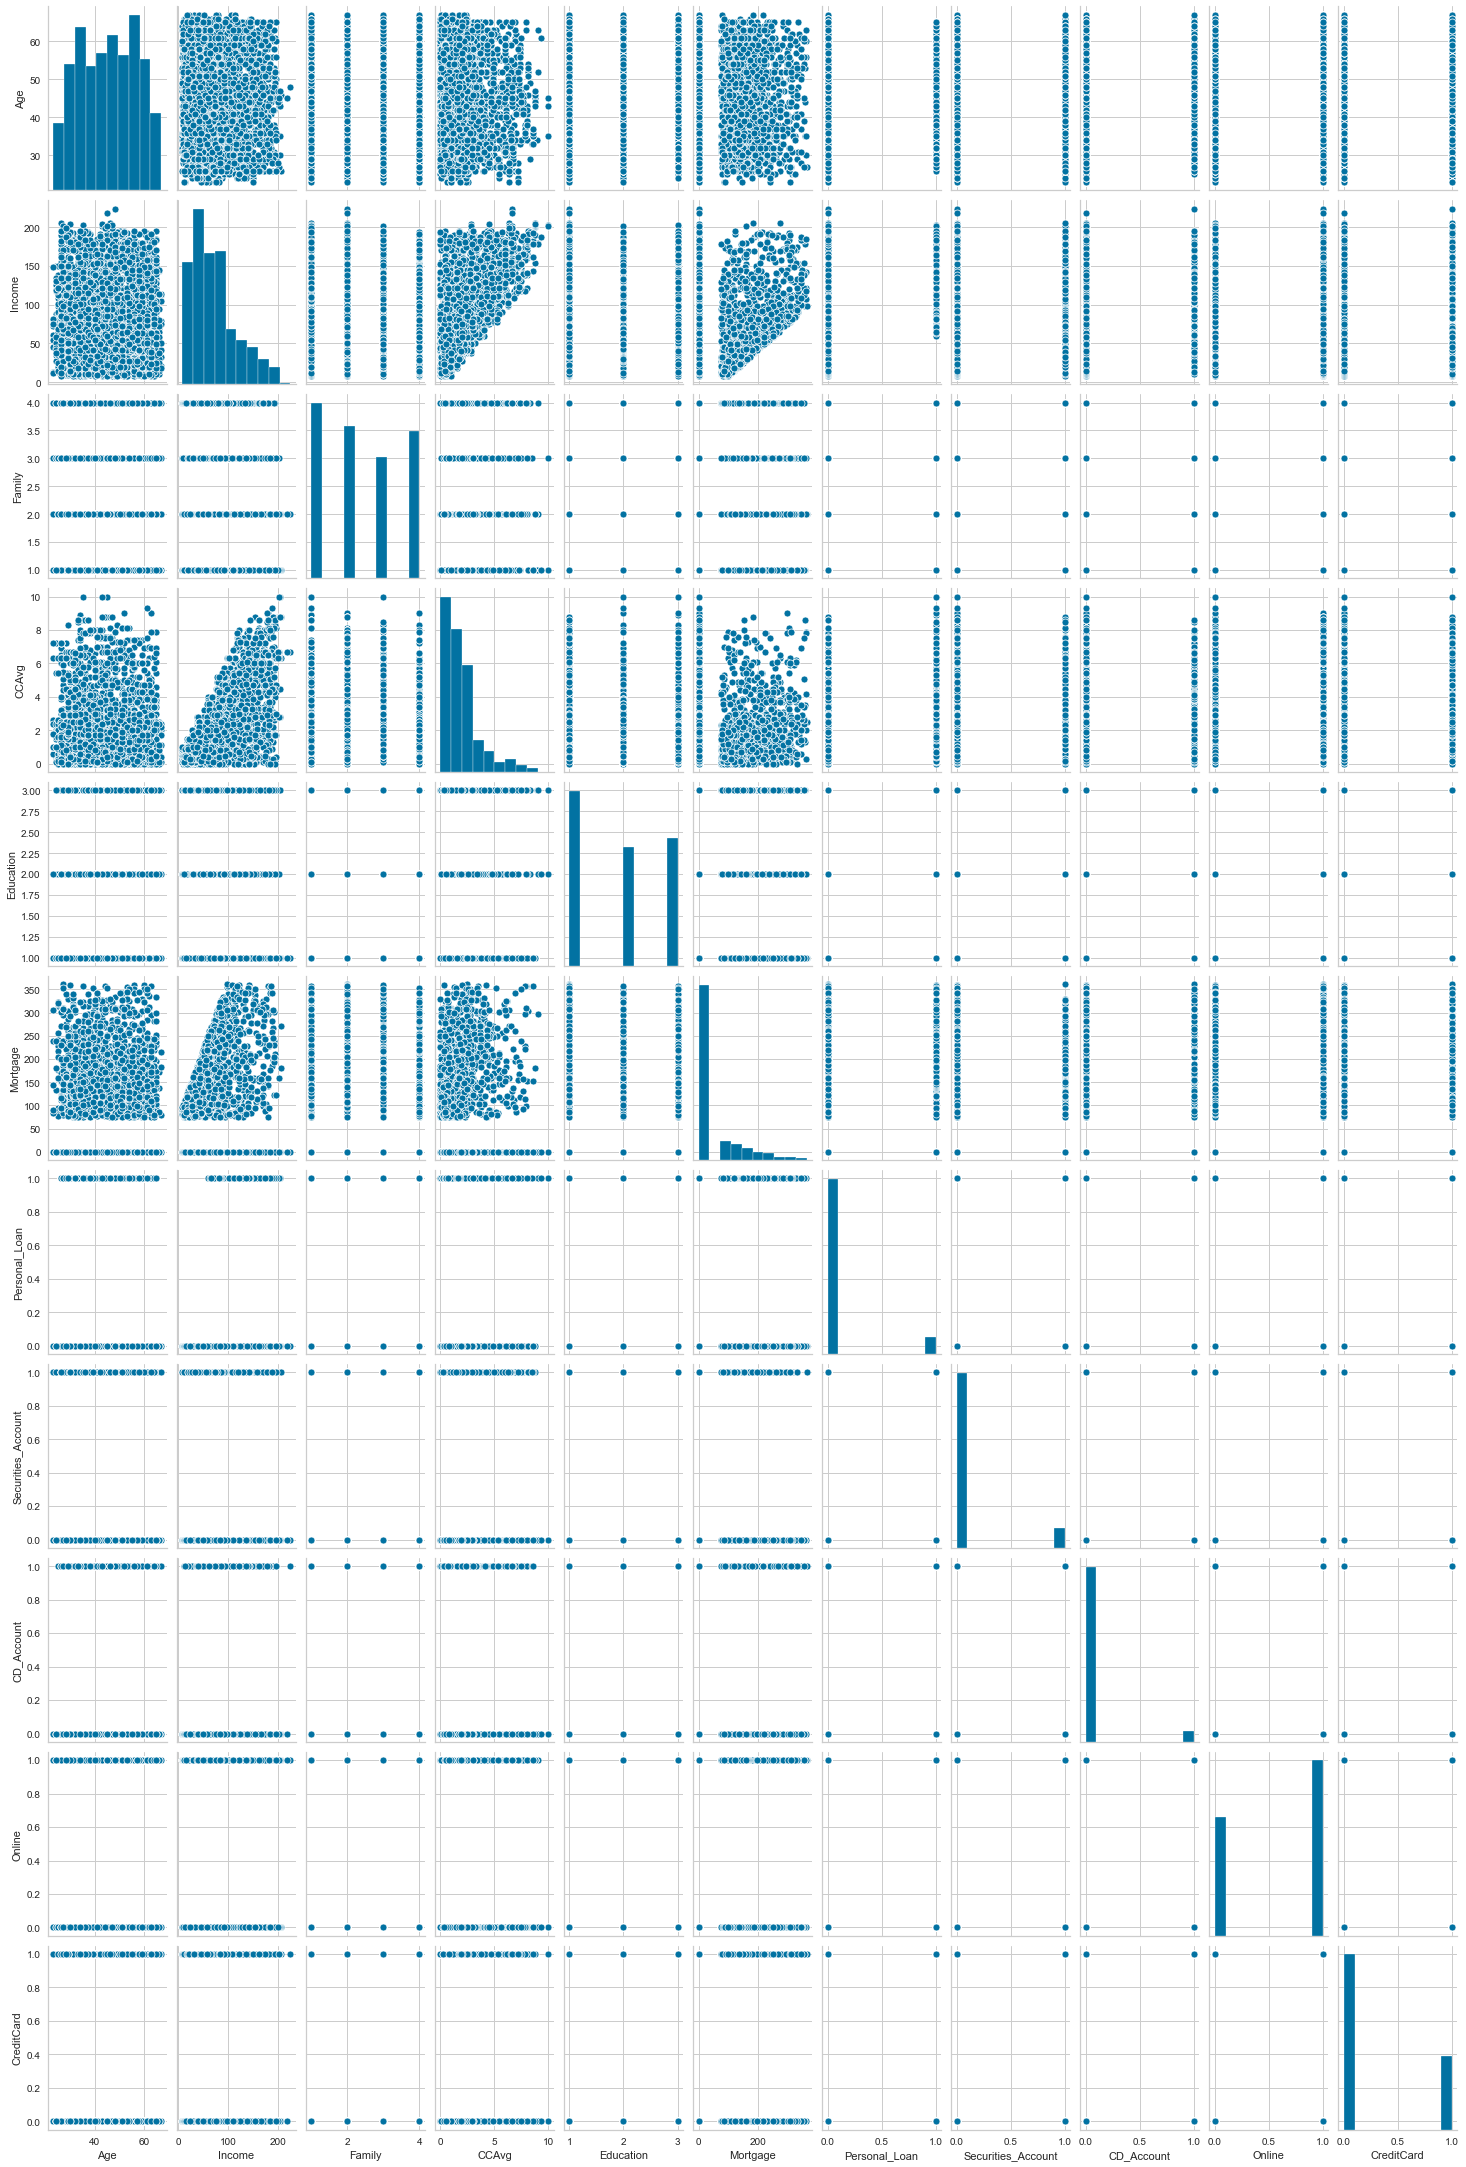

In [164]:
g=sns.pairplot(df)
g.fig.set_size_inches(20,30);

In [165]:
df.corr() # Shows the  correlation matrix 

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,-0.057196,-0.046163,-0.051422,0.043605,-0.012074,-0.010252,0.001104,0.008673,0.016370,0.008898
Income,-0.057196,1.000000,-0.157465,0.648158,-0.185354,0.066638,0.492443,-0.000111,0.157302,0.014714,0.001019
Family,-0.046163,-0.157465,1.000000,-0.109337,0.059345,-0.004375,0.052629,0.021368,0.010479,0.010588,0.008357
CCAvg,-0.051422,0.648158,-0.109337,1.000000,-0.140421,0.026341,0.358538,0.016076,0.125942,-0.000724,-0.010751
Education,0.043605,-0.185354,0.059345,-0.140421,1.000000,-0.007850,0.130054,-0.013117,0.001821,-0.018015,-0.017385
Mortgage,-0.012074,0.066638,-0.004375,0.026341,-0.007850,1.000000,0.047103,-0.005850,0.051827,-0.010996,0.000472
Personal_Loan,-0.010252,0.492443,0.052629,0.358538,0.130054,0.047103,1.000000,0.020701,0.296584,0.003965,-0.002595
Securities_Account,0.001104,-0.000111,0.021368,0.016076,-0.013117,-0.005850,0.020701,1.000000,0.317025,0.012495,-0.015588
CD_Account,0.008673,0.157302,0.010479,0.125942,0.001821,0.051827,0.296584,0.317025,1.000000,0.172959,0.274730
Online,0.016370,0.014714,0.010588,-0.000724,-0.018015,-0.010996,0.003965,0.012495,0.172959,1.000000,0.002020


In [167]:
corr_list = df.corrwith(df["Personal_Loan"])
corr_list

Age                  -0.010252
Income                0.492443
Family                0.052629
CCAvg                 0.358538
Education             0.130054
Mortgage              0.047103
Personal_Loan         1.000000
Securities_Account    0.020701
CD_Account            0.296584
Online                0.003965
CreditCard           -0.002595
dtype: float64

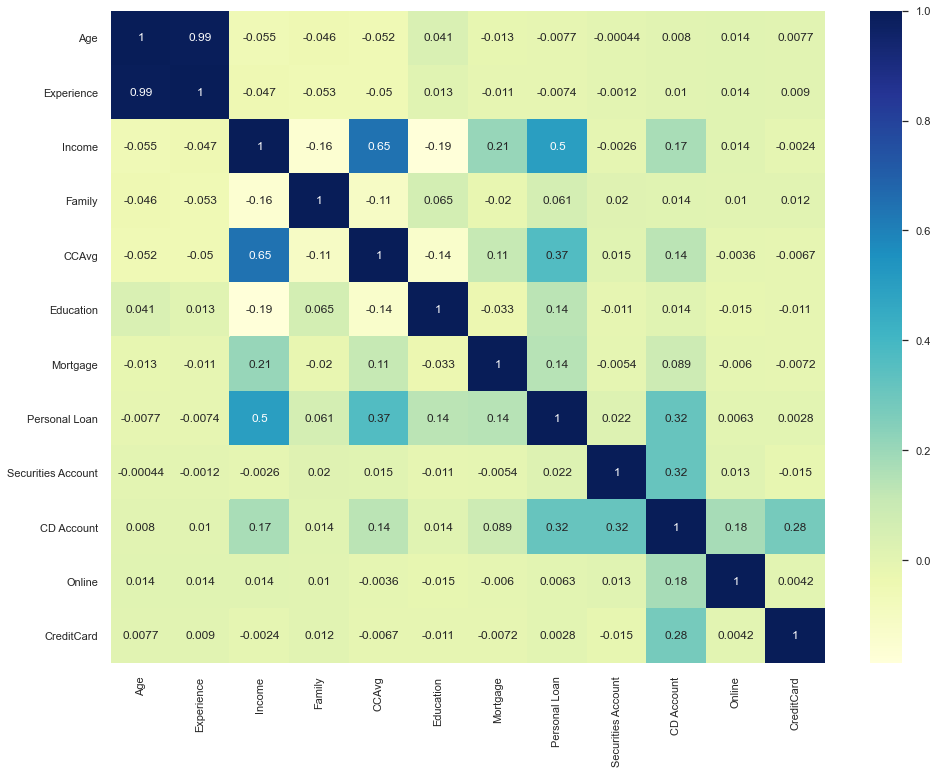

In [169]:

#Correlation analysis using heat map
f, ax = plt.subplots(figsize=(16, 12))
sns.set()
sns.heatmap(df_copy[['Age','Experience','Income','Family','CCAvg', 'Education', 'Mortgage', 'Personal Loan','Securities Account','CD Account','Online','CreditCard']].corr(),annot=True,cmap='YlGnBu')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8f3b978d0>,
      dtype=object)

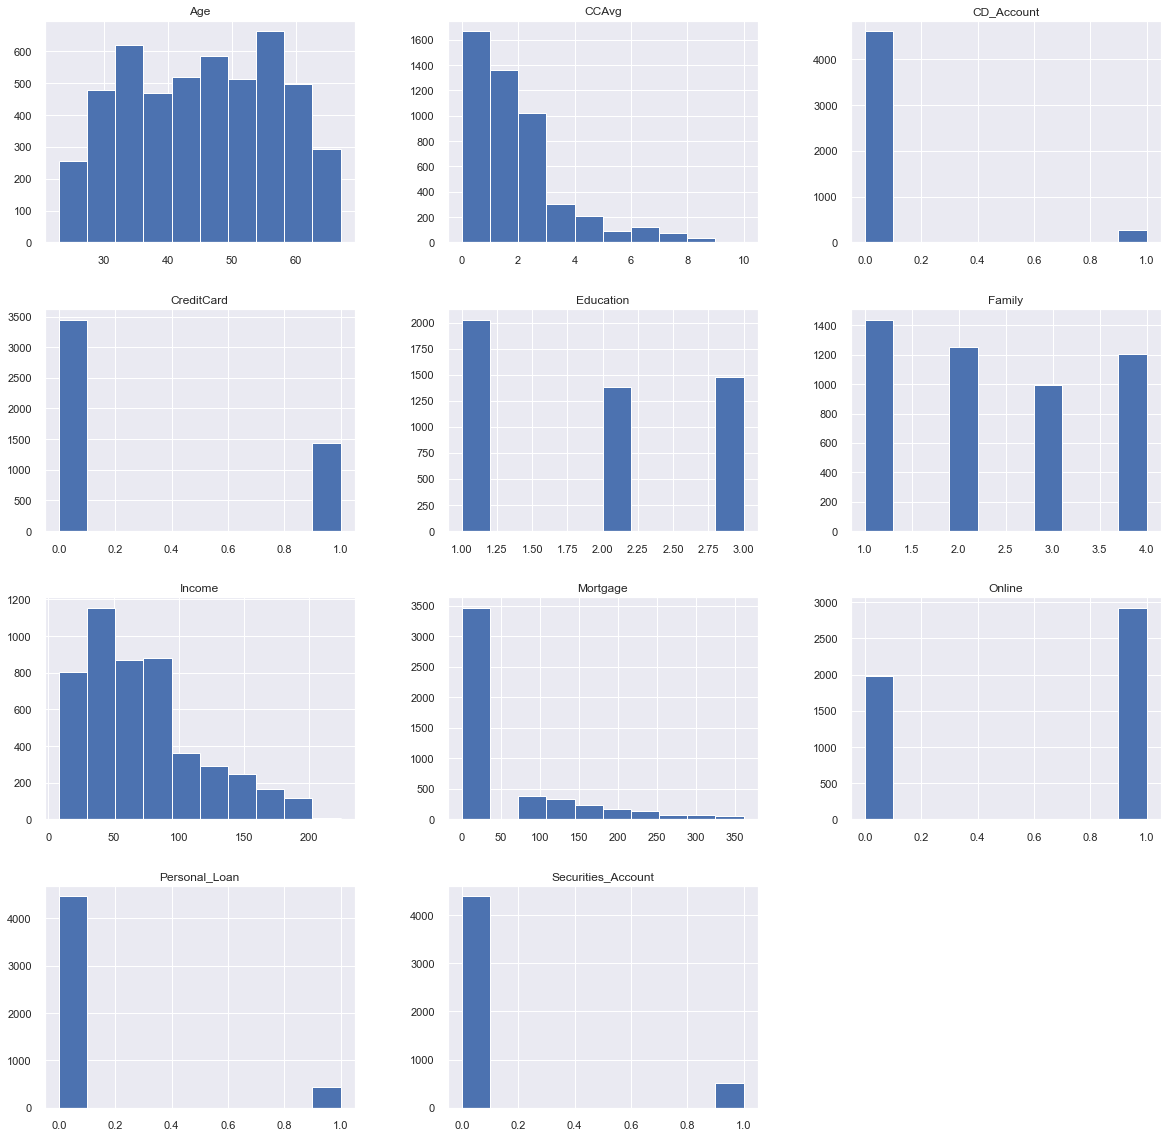

In [170]:
df.hist(figsize = [20,20])

# EDA: Study the data distribution in each attribute and target variable, share your findings
(20 marks)
- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready

In [172]:
df_copy.nunique() #Number of unique in each column?


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [173]:
#Number of people with zero mortgage?
(df_copy["Mortgage"]== 0).sum()

3462

In [174]:
#Number of people with zero credit card spending per month?
(df_copy["CCAvg"]== 0).sum()

106

# Value counts of all categorical columns.

In [176]:
df_copy['Family'].value_counts().sort_index()
#pers_loan.sort(['Family'],ascending=True)

1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64

In [177]:
df_copy['Education'].value_counts().sort_index()

1    2096
2    1403
3    1501
Name: Education, dtype: int64

In [178]:
df_copy['Personal Loan'].value_counts().sort_index()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [179]:
df_copy['Securities Account'].value_counts().sort_index()

0    4478
1     522
Name: Securities Account, dtype: int64

In [180]:
df_copy['CD Account'].value_counts().sort_index()

0    4698
1     302
Name: CD Account, dtype: int64

In [181]:
df_copy['Online'].value_counts().sort_index()

0    2016
1    2984
Name: Online, dtype: int64

In [182]:
df_copy['CreditCard'].value_counts().sort_index()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [52]:
import pandas_profiling
df.profile_report()

In [53]:
df.drop('ID',axis=1,inplace=True)
df.drop('Experience',axis=1,inplace=True)
df.drop('ZIP_Code',axis=1,inplace=True)



# Bivariate Analysis

cross tabulation can be given as:  
 Personal_Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
cros tabulation in percentages can be given as : 
 Personal_Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


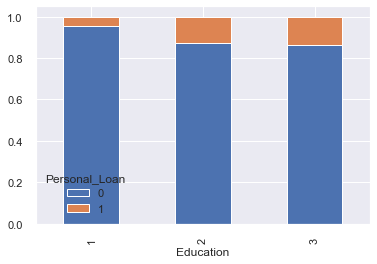

In [54]:
#Categorical Independent Variables Vs Target Variable
edu=pd.crosstab(df['Education'],df['Personal_Loan'])
edu.div(edu.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print('cross tabulation can be given as: ' ,'\n',edu)
print('cros tabulation in percentages can be given as :' , '\n', edu.div(edu.sum(1).astype(float), axis=0))

From the above plots, we can infer that customers who are more educated have a higher probability of buying personal loans.

cross tabulation can be given as:  
 Personal_Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
cros tabulation in percentages can be given as : 
 Personal_Loan         0         1
1              1.360734  0.063179
2              0.942130  0.140432
3              1.283168  0.202970
4                   NaN       NaN


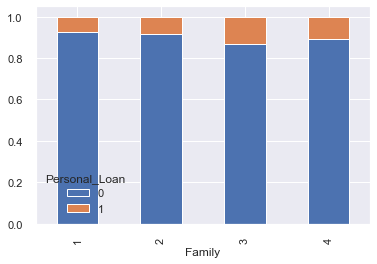

In [55]:
family=pd.crosstab(df['Family'],df['Personal_Loan'])
family.div(family.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print('cross tabulation can be given as: ' ,'\n',edu)
print('cros tabulation in percentages can be given as :' , '\n', edu.div(family.sum(1).astype(float), axis=0))

The number of family members not significantly affect probability. Hence it contradicts our hypothesis that the number of family members will affect the probability.

# Boolean Independent Variable vs Target Variable

cross tabulation can be given as:  
 Personal_Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
cros tabulation in percentages can be given as : 
 Personal_Loan         0         1
0                   NaN       NaN
1              0.633111  0.068225
2                   NaN       NaN
3                   NaN       NaN


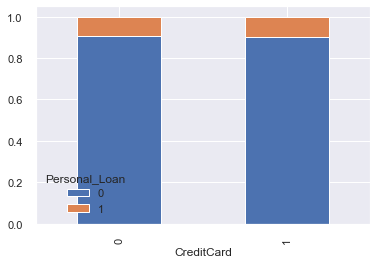

In [56]:
credit=pd.crosstab(df['CreditCard'],df['Personal_Loan'])
credit.div(credit.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print('cross tabulation can be given as: ' ,'\n',edu)
print('cros tabulation in percentages can be given as :' , '\n', credit.div(edu.sum(1).astype(float), axis=0))

The customer who uses or doesn’t use a credit card issued by UniversalBank doesn’t seem to affect the probability of buying a personal loan.

cross tabulation can be given as:  
 Personal_Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
cros tabulation in percentages can be given as : 
 Personal_Loan         0         1
0                   NaN       NaN
1              1.284828  0.138836
2                   NaN       NaN
3                   NaN       NaN


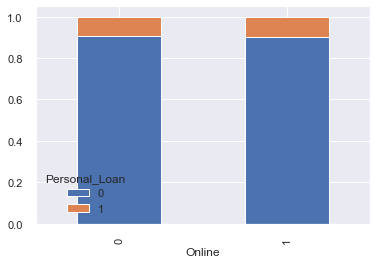

In [62]:
online=pd.crosstab(df['Online'],df['Personal_Loan'])
online.div(online.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print('cross tabulation can be given as: ' ,'\n',edu)
print('cros tabulation in percentages can be given as :' , '\n', online.div(edu.sum(1).astype(float), axis=0))

The customer who uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans.

cross tabulation can be given as:  
 Personal_Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
cros tabulation in percentages can be given as : 
 Personal_Loan         0         1
0                   NaN       NaN
1              1.284828  0.138836
2                   NaN       NaN
3                   NaN       NaN


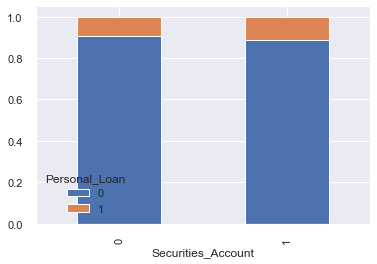

In [63]:
sec=pd.crosstab(df['Securities_Account'],df['Personal_Loan'])
sec.div(sec.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print('cross tabulation can be given as: ' ,'\n',edu)
print('cros tabulation in percentages can be given as :' , '\n', online.div(edu.sum(1).astype(float), axis=0))

The customers who have or don’t have securities account with the bank do not affect the probability of buying a personal loan.

# Numerical Independent Variable vs Target Variable

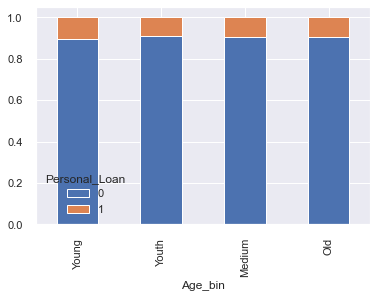

In [64]:
bins=[23,35,45,55,67]
group=['Young','Youth','Medium','Old']
df['Age_bin']=pd.cut(df['Age'],bins,labels=group)
age=pd.crosstab(df['Age_bin'],df['Personal_Loan'])
age.div(age.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

It can be inferred that the Applicant age does not affect the chances of buying the personal loan which contradicts our hypothesis in which we assumed that the applicant age is a major factor for buying the loan.

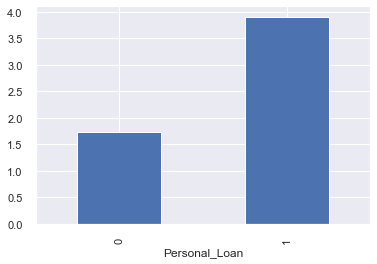

In [65]:
df.groupby('Personal_Loan')['CCAvg'].mean().plot(kind='bar')

Here the y-axis represents the mean applicant spending on credit cards per month ($000). It can be clearly seen that applicants who spend more on credit cards are more viable to buy personal loans.

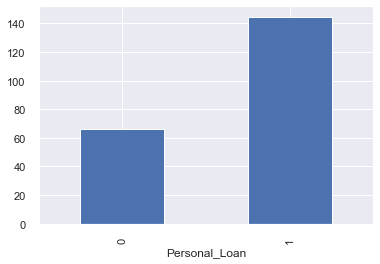

In [66]:
df.groupby('Personal_Loan')['Income'].mean().plot(kind='bar')

It can be clearly seen that the customers with high incomes are more feasible to buy the personal loan

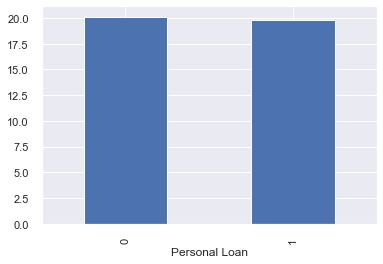

In [67]:
df_copy.groupby('Personal Loan')['Experience'].mean().plot(kind='bar')

Experience’ is highly correlated with ‘Age’

# Missing Values & Outlier Treatment

In [68]:
df.drop('Age_bin',axis=1,inplace=True)

In [91]:
df.isnull().sum()
df.isna().values.any()


Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

False

From Pandas Profiling we found that for Mortgage the mean value is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.104002319) and there are a lot of outlier’s present (Kurtosis = 4.756796669)

In [70]:
from scipy import stats
df['Mortgage_zscore']=np.abs(stats.zscore(df['Mortgage']))
df=df[df['Mortgage_zscore']<3]
df.drop('Mortgage_zscore',axis=1, inplace=True)

In [71]:
df.shape


(4895, 11)

# Model Building: Logistic Regression

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.

This function creates an S-shaped curve with the probability estimate, which is very similar to the required stepwise function

We will use scikit-learn (sklearn) for making different models which is an open-source library for Python. It is one of the most efficient tools which contains many inbuilt functions that can be used for modeling in Python.
Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the dataset and save it in another dataset with the help of train_test_split function in the model_selection library of sklearn.

In [72]:
#col_names=df.columns
#scaler=preprocessing.StandardScaler()
#scaled_X_train=scaler.fit_transform(X_train)
#scaled_X_test=scaler.fit_transform(X_test)

In [102]:
df[df['Personal_Loan'].isna()]
df.describe().transpose()
df.groupby(["Personal_Loan"]).mean()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


,count,mean,std,min,25%,50%,75%,max
Age,4895.0,45.342594,11.463954,23.0,35.0,45.0,55.0,67.0
Income,4895.0,72.010623,44.717543,8.0,38.0,63.0,93.0,224.0
Family,4895.0,2.401634,1.149651,1.0,1.0,2.0,3.0,4.0
CCAvg,4895.0,1.900172,1.709268,0.0,0.7,1.5,2.5,10.0
Education,4895.0,1.887436,0.839485,1.0,1.0,2.0,3.0,3.0
Mortgage,4895.0,48.017773,83.849944,0.0,0.0,0.0,94.0,361.0
Personal_Loan,4895.0,0.088458,0.283988,0.0,0.0,0.0,0.0,1.0
Securities_Account,4895.0,0.104392,0.305800,0.0,0.0,0.0,0.0,1.0
CD_Account,4895.0,0.057610,0.233028,0.0,0.0,0.0,0.0,1.0
Online,4895.0,0.596527,0.490644,0.0,0.0,1.0,1.0,1.0


,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,
0,45.379202,65.151502,2.382788,1.709283,1.853429,46.787539,0.102420,0.036082,0.595921,0.295159
1,44.965358,142.692841,2.595843,3.867252,2.237875,60.695150,0.124711,0.279446,0.602771,0.290993


In [140]:
X=df.drop('Personal_Loan',axis=1)
y=df['Personal_Loan']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train.head()
X_test.head()
y_train.head()
y_test.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
3402,64,95,2,0.0,3,0,0,0,1,1
4688,29,69,4,1.8,2,0,0,0,1,1
4505,40,90,4,1.1,2,0,1,0,1,0
2238,48,35,1,1.4,3,0,0,0,1,0
3,35,100,1,2.7,2,0,0,0,0,0


,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
658,52,35,3,0.90,3,0,0,0,0,0
3841,30,81,2,0.20,1,0,0,0,1,0
1036,53,55,4,0.90,1,119,0,0,1,1
4857,37,115,1,0.80,2,0,0,0,1,1
624,33,54,2,1.67,2,122,0,0,1,0


3402    0
4688    0
4505    0
2238    0
3       0
Name: Personal_Loan, dtype: int64

658     0
3841    0
1036    0
4857    0
624     0
Name: Personal_Loan, dtype: int64

In [126]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

74.99% data is in training set
25.01% data is in test set


In [127]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
LogReg_model = LogisticRegression()
LogReg_model.fit(X_train,y_train)

LogisticRegression()

In [138]:
y_pred=LogReg_model.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1117
           1       0.81      0.61      0.70       107

    accuracy                           0.95      1224
   macro avg       0.89      0.80      0.83      1224
weighted avg       0.95      0.95      0.95      1224

0.9534313725490197
[[1102   15]
 [  42   65]]


In [145]:
y_predict = LogReg_model.predict(X_test)

In [146]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9515469935785172

Testing accuracy 0.9482641252552757

Confusion Matrix


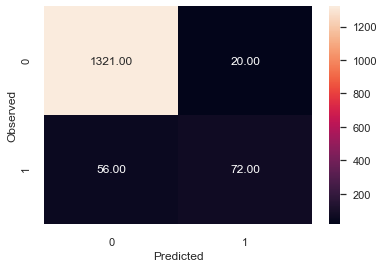

None

Recall: 0.5625

Precision: 0.782608695652174

F1 Score: 0.6545454545454547

Roc Auc Score: 0.7737928784489186


In [148]:
print("Trainig accuracy",LogReg_model.score(X_train,y_train))  
print()
print("Testing accuracy",LogReg_model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

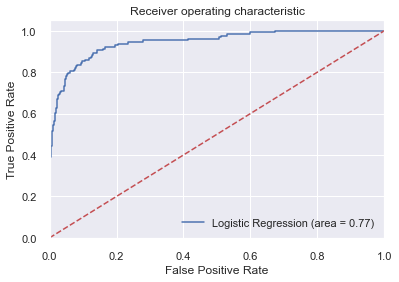

In [151]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, LogReg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [152]:
LogReg_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [154]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=0.75, random_state=42, solver='newton-cg')

LogisticRegression(C=0.75, random_state=42)

LogisticRegression(C=0.75, random_state=42, solver='liblinear')

LogisticRegression(C=0.75, random_state=42, solver='sag')

LogisticRegression(C=0.75, random_state=42, solver='saga')

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.952, 0.952, 0.949, 0.907, 0.907]

[0.951, 0.948, 0.948, 0.9, 0.899]


In [153]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=0.75, penalty='l1', random_state=42, solver='liblinear')

LogisticRegression(C=0.75, penalty='l1', random_state=42, solver='saga')

['liblinear', 'saga']

[0.952, 0.907]

[0.952, 0.9]


In [155]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

LogisticRegression(class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

Trainig accuracy 0.8960887332165791

Testing accuracy 0.89857045609258


In [156]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

LogisticRegression(C=0.25, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

LogisticRegression(C=0.5, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

LogisticRegression(C=0.75, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.81, 0.896, 0.897, 0.896, 0.896, 0.896]

[0.808, 0.893, 0.899, 0.899, 0.899, 0.899]


In [ ]:
## Best testing accuracy is obtained for C=0.5, which is default

LogisticRegression(C=0.5, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

Trainig accuracy 0.8963806187974314

Testing accuracy 0.8992511912865895

Confusion Matrix


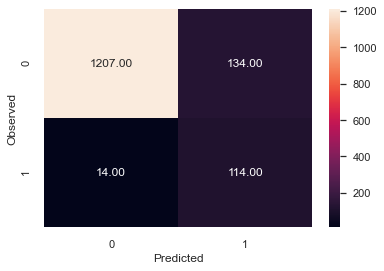

None

Recall: 0.890625

Precision: 0.4596774193548387

F1 Score: 0.6063829787234042

Roc Auc Score: 0.8953497856077555


In [157]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Give your reasoning on how can the model perform better? (10 marks)
Hint: Check parameter


The model can perfprm with the recall of 89%

Give Business understanding of your model? (5 marks)

And here we are with a classification report which consists of a precision, recall, f1-score & support, Also the accuracy_score and a 2*2 confusion matrix. How to determine if our model has done well…? Well first have a look at the accuracy, 92% accuracy is not a small thing, but we know from the data that the number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed.
We will look upon the error types now:
Type I error — Actually null hypothesis but predicted alternate hypothesis by the model
Type II error — Actually alternate hypothesis but predicted null hypothesis by the model
In our case, the null hypothesis presents the non-buyer case, while the alternate hypothesis is the buyer one.
We must concentrate upon or reduce type II error here since we are interested in the customers who had actually bought personal loans, but our model predicted them to be a non-buyer.
Eventually, we can concentrate upon our confusion matrix and look for the False Negatives which in this case is 76, less the number of False Negatives, wiser our model will be or we can directly look upon the recall for ‘1’ which in this case is 29%. So, in this case, out of the total number of customers who actually bought personal loans our model is only able to pick 29% of customers of them to be correctly predicted.
From now onwards, we will print all three, but we can directly compare the recall for ‘1’ to compare different models.
Also, Accuracy (not similar to accuracy_score) is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test. A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:
.90–1 = excellent (A) .80-.90 = good (B) .70-.80 = fair © .60-.70 = poor (D) .50-.60 = fail (F)
We will also compare the area under roc curve to determine how our model performs. In this case, the area comes out to be around 92% which is good.

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8e6cf3150>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7fa8e8f46810>,
                     model=None)

0.8992511912865895

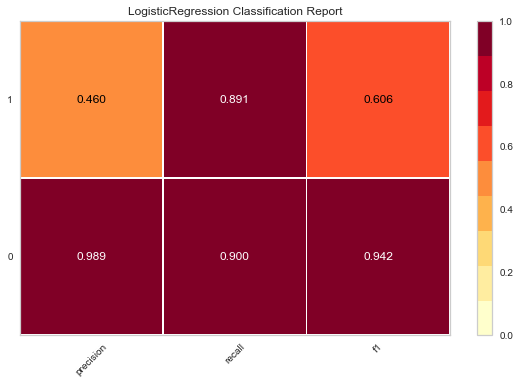

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa93f9e6910>,
       model=None)

0.9525380892330192

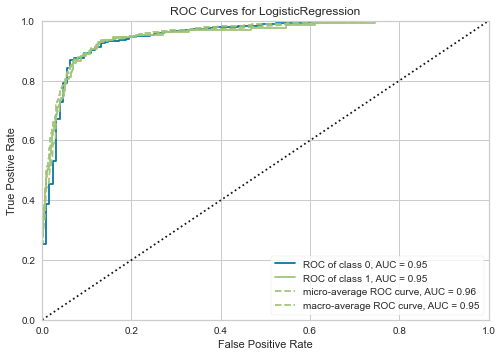

In [158]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()